# Feature Taxonomy Abundance
The goal of this notebook is to give more insight onto the taxonomy of our selected features. From the machine learning analysis, the Songbird Top25/Bot25 feature set perfomed the best from the Songbird features so I will look into the specifics of this feature set.

In [1]:
%matplotlib inline
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import os
import qiime2
os.chdir('/Users/tgroth/Google Drive/knight_twin_NAFLD/serum_analysis')

## Load in the features and the taxa

In [2]:
#load in the songbird top+bot 25 features
sb_topbot = pd.read_csv('./fecal_ml_analysis/sonbird_topbot.txt',sep='\t',header=None,names=['feature_id'])
#loading in feature data to add to feature tables
feat_data = pd.read_csv('./classified-feature-table-data.tsv',sep='\t',index_col=0)

## Creating Separate Tables for Songbird and Model selected features
Each table will be samples x features. The samples will then be converted to whether each sample is non-NAFLD or NAFLD-cirrhosis. The feature names will then be converted to whichever taxonomy name you want to group by. Then I can do a box plot with the x-axis as the taxonomy, the y-axis as the abundance and the grouping by disease state.

In [3]:
#first creating 2 list of samples for G1P and G3P
fecal_table = qiime2.Artifact.load('fecal_ml_analysis/fecal-ft-hashed-scaled_drop.qza')
fecal_tablepd = fecal_table.view(pd.DataFrame)
meta = pd.read_csv('./fecal_metadata.tsv',sep='\t',index_col=0)
g1p = [idx for idx in meta[meta.ATTRIBUTE_groups=='G1P'].index]
g3p = [idx for idx in meta[meta.ATTRIBUTE_groups=='G3P'].index]
print('non-NAFLD patients: %d, NAFLD-cirrhosis patients: %d' %(len(g1p),len(g3p)))

non-NAFLD patients: 56, NAFLD-cirrhosis patients: 24


In [4]:
#retain only non-NAFLD and NAFLD-cirrhosis samples in feature table
feat_samples = fecal_tablepd.loc[(g1p+g3p)]
feat_samples.shape

(80, 985)

### Create Songbird table

In [5]:
#only retain features that are in the songbird set
sb_feat = feat_samples.loc[:,sb_topbot['feature_id']].copy()
sb_feat.shape

(80, 50)

In [6]:
sb_feat

,fb758530086adf438d5ebe8f83847f2d,0ba75f593218ef056eefaeab285ae839,cdf8d23687cfc324485e2bd3e0094ff2,d2ef3361261cc1d835ad59394bfe161c,4deeef4aa3231abf469afec860b7b1ea,f2f3dfa3c15062c6cc6fdda001f9ab52,db77705855bc4611e9c4fedca4b4f926,c0095c69fee5c767903814b366fcb860,0366e39a2c8c5aeaa60e42839a8b33e9,31b4a92e41933b13e3182509ebcd71e6,...,330ecd6db6cc2c9b2017df5c06fb44f5,f3c9367e79341d7de4456c32b588b86f,5d6c8094421e22fa24e09de3169f49b4,b591a5b10d81884ab46dca87ee7c4e5f,901b6e2bf2d45cfa9b38a99784cd0459,f79e87a88230b8782266ce098425c4ce,28a02f8e5fcae1d3b8d41678bf1276fd,832c0802efe61204586cbbefee574d43,039ff7a0517b5399a9c2730881803a67,87b2ee3ab5930cf0663d663ff1b3c524
TW-AF-001_BA7_01_29832.mzXML,-0.122031,-0.109420,-0.092878,-0.104913,-0.162141,-0.183899,-0.230119,-0.198671,-0.250963,-0.338816,...,-0.198899,-0.209682,-0.249896,-0.256578,-0.248609,-0.211963,-0.193508,-0.248903,-0.195939,-0.270654
TW-AG-002_BG1_01_29915.mzXML,-0.122031,-0.109420,-0.092878,-0.104913,-0.162141,-0.183899,-0.230119,-0.198671,0.659088,0.335439,...,-0.198899,0.580400,-0.249896,-0.256578,-0.248609,-0.211963,0.256323,-0.248903,-0.195939,-0.270654
TW-AI-001__RNA_LATER__BB2_01_29849.mzXML,-0.122031,-0.109420,-0.092878,-0.048971,-0.162141,-0.183899,-0.230119,-0.118315,-0.250963,-0.338816,...,-0.198899,-0.209682,-0.249896,-0.256578,-0.248609,-0.211963,-0.193508,0.672561,-0.195939,-0.270654
TW-AM-001_BB4_01_29847.mzXML,-0.122031,-0.109420,-0.092878,-0.104913,-0.162141,-0.183899,-0.230119,-0.198671,-0.250963,-0.338816,...,-0.198899,-0.209682,-0.249896,-0.256578,-0.248609,-0.211963,-0.193508,-0.248903,-0.195939,-0.270654
TW-AN-001_RF7_01_29754.mzXML,-0.122031,0.010035,-0.092878,-0.017441,-0.162141,-0.183899,0.413654,0.086674,-0.250963,-0.338816,...,-0.198899,8.942402,-0.249896,-0.256578,-0.248609,2.167565,10.451855,-0.248903,-0.195939,1.850756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CIR6-001_BE6_01_29884.mzXML,0.012106,-0.029223,-0.040313,-0.021105,-0.162141,-0.183899,0.285997,0.153647,-0.250963,-0.338816,...,0.037892,-0.209682,-0.249896,-0.256578,-0.248609,-0.211963,-0.193508,-0.248903,-0.195939,-0.270654
CIR60-001_BA8_01_29831.mzXML,-0.122031,-0.109420,-0.092878,-0.104913,-0.162141,-0.183899,-0.230119,-0.198671,-0.250963,-0.338816,...,-0.198899,-0.209682,-0.249896,-0.256578,-0.248609,-0.211963,-0.193508,-0.248903,-0.195939,-0.270654
CIR61-001_RD7_01_29728.mzXML,-0.122031,-0.109420,-0.092878,-0.104913,0.495030,-0.183899,-0.230119,-0.198671,-0.250963,-0.338816,...,-0.198899,-0.209682,-0.249896,-0.256578,-0.248609,-0.211963,-0.193508,-0.248903,-0.195939,-0.270654
CIR63-001_BC1_01_29863.mzXML,-0.122031,-0.109420,-0.092878,-0.065121,-0.162141,-0.183899,-0.230119,0.012984,-0.250963,-0.338816,...,-0.198899,-0.209682,-0.249896,-0.256578,-0.248609,-0.211963,-0.193508,-0.248903,-0.195939,-0.270654


In [12]:
def create_seaborn_df(feat_table,metadata,feat_data,taxa_level):
    import re
    import seaborn as sns
    import pandas as pd
    from matplotlib import pyplot as plt
    #splitting samples into their disease states
    g1p = [idx for idx in meta[meta.ATTRIBUTE_groups=='G1P'].index]
    g3p = [idx for idx in meta[meta.ATTRIBUTE_groups=='G3P'].index]
    
    temp_feat = feat_table.reset_index().rename(columns={'index':'samples'})
    #creating column for the samples disease state G1P:non-NAFLD, G3P:NAFLD-cirrhosis
    dis_state = []
    for s in temp_feat['samples']:
        if s in g1p:
            dis_state.append('non-NAFLD')
        elif s in g3p:
            dis_state.append('NAFLD-cirrhosis')
    temp_feat['disease state'] = dis_state
    temp_feat.drop(columns=['samples'],inplace=True)
    
    #melting table
    feat_melted = pd.melt(temp_feat, id_vars=['disease state'], value_vars=temp_feat.columns[:-1].astype(str),
                         var_name=taxa_level, value_name='feature abundance')
    
    #feature names to their taxa at the specified level
    taxa_list = []
    for t in feat_melted[taxa_level]:
        temp_taxa = feat_data.loc[t][taxa_level]
        temp_taxa = re.sub('\s{1,}', '\n', temp_taxa)
        taxa_list.append(temp_taxa)
    feat_melted.subclass = taxa_list

    #now have to melt dataframe so can use seaborn
    return feat_melted
    

In [13]:
level = 'subclass'
sb_sns_df = create_seaborn_df(sb_feat,meta,feat_data,level)
sb_sns_df.columns

Index(['disease state', 'subclass', 'feature abundance'], dtype='object')

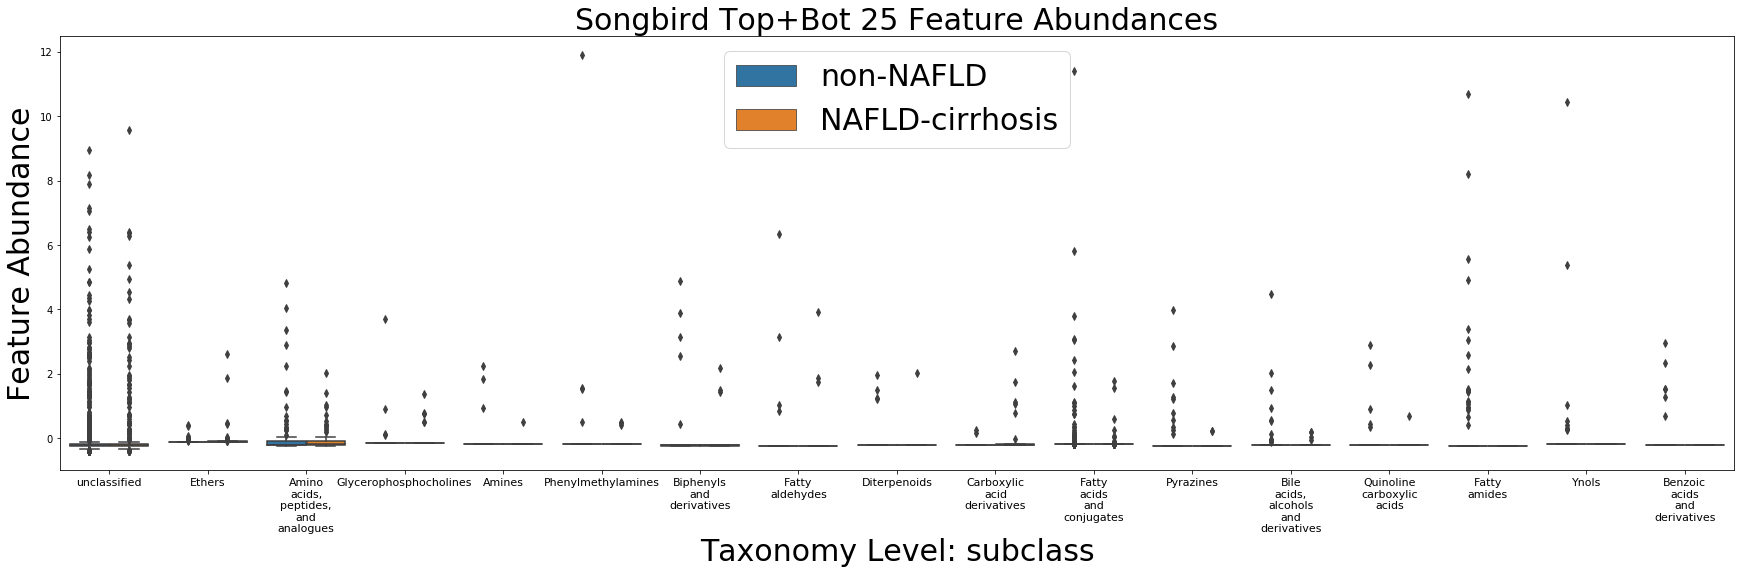

In [14]:
fig, ax = plt.subplots(figsize=(30,8))
ax = sns.boxplot(x=level,y='feature abundance',hue='disease state',data=sb_sns_df)
plt.title('Songbird Top+Bot 25 Feature Abundances',fontsize=30)
plt.xticks(fontsize=11)
plt.xlabel('Taxonomy Level: %s'%level,fontsize=30)
plt.ylabel('Feature Abundance', fontsize=30)
plt.legend(fontsize=30)

## Create model features table

In [7]:

#only retain features that are in the songbird set
model_feat = feat_samples.loc[:,model20['feature_id']].copy()
model_feat.shape

NameError: name 'model20' is not defined

In [300]:
model_sns_df = create_seaborn_df(model_feat,meta,feat_data,level)
model_sns_df.columns

Index(['disease state', 'subclass', 'feature abundance'], dtype='object')

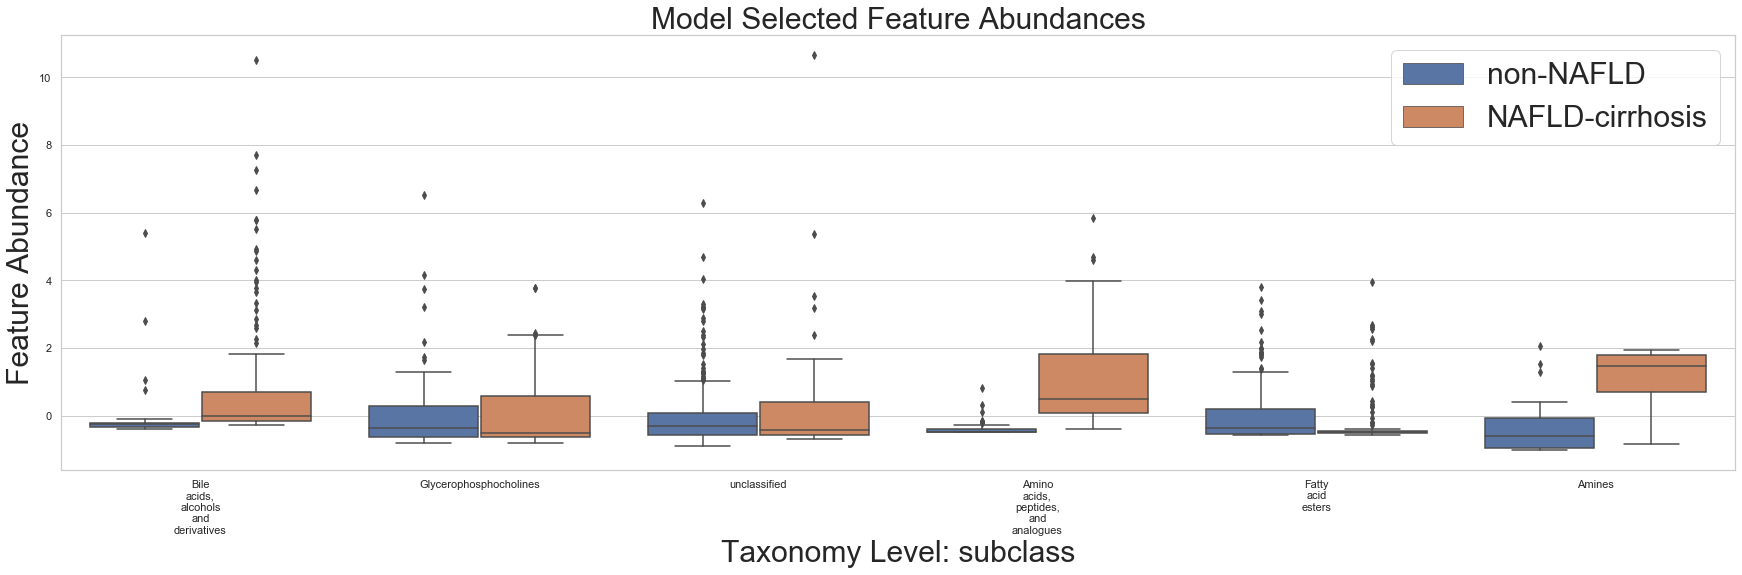

In [301]:
fig, ax = plt.subplots(figsize=(30,8))
ax = sns.boxplot(x=level,y='feature abundance',hue='disease state',data=model_sns_df)
plt.title('Model Selected Feature Abundances',fontsize=30)
plt.xticks(fontsize=11)
plt.xlabel('Taxonomy Level: %s'%level,fontsize=30)
plt.ylabel('Feature Abundance', fontsize=30)
plt.legend(fontsize=30)

## Plotting Feature Importance Feat1

In [3]:
feat1_imp = pd.read_csv('./ml_analysis/featImp_analysis/feat1-featimp-taxa.tsv',sep='\t')
feat1_imp.head()

,feat importance,hashedID,featueID,kingdom,superclass,class,subclass,direct_parent
0,0.064646,0004069a1f2c3f2b14511a4f367e485d,1440,unclassified,unclassified,unclassified,unclassified,unclassified
1,0.023834,0013ada35a72573fde974722d6f46269,762,unclassified,unclassified,unclassified,unclassified,unclassified
2,0.049712,0074f0d3d22016bcdf28ee53c8a5062b,4423,unclassified,unclassified,unclassified,unclassified,unclassified
3,0.056723,012ade16945709e69650957b8fdeb021,4965,Organic compounds,Lipids and lipid-like molecules,Glycerophospholipids,Glycerophosphocholines,1-acyl-sn-glycero-3-phosphocholines
4,0.033299,015bcc773d2fe77d5ddf3533aff00a9f,4725,unclassified,unclassified,unclassified,unclassified,unclassified


In [11]:
def imp_plot(table, taxa_level):
    from matplotlib.pyplot import figure
    fig = plt.figure(num=None, figsize=(10, 10), facecolor='w', edgecolor='k')
    #creating dict for with taxa as keys, feat imp as values
    taxa_dict = {}
    for idx in table.index:
        taxa = table.loc[idx][taxa_level]
        feat_imp = table.loc[idx]['feat importance']
        #taxa not in dict, set new value
        if taxa not in taxa_dict:
            taxa_dict[taxa] = feat_imp
        #taxa in dict, update value    
        else:
            taxa_dict.update({taxa : feat_imp+taxa_dict.get(taxa)})
    taxa_counts = table[taxa_level].value_counts()
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    taxa_sorted = sorted(taxa_dict, key=taxa_dict.get)
    y_pos = np.arange(len(taxa_sorted))
    feat_imp = [taxa_dict[tx] for tx in taxa_sorted]
#     color_list = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', 
#                   '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', 
#                   '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', 
#                  '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#000000','#6495ed']
    color_list = ['#696969', '#8b4513', '#006400', '#808000',
                  '#483d8b', '#3cb371', '#9acd32', '#00008b',
                  '#8b008b', '#ff0000', '#ffff00', '#7cfc00',
                  '#9400d3', '#00ff7f', '#dc143c', '#00ffff',
                  '#f4a460', '#0000ff', '#db7093', '#6495ed', '#add8e6', '#ff1493', '#7b68ee', '#ee82ee','#ffe4c4']    

    ax.barh(y_pos, feat_imp, align='center',color = color_list)
    taxa_count_list = []
    for taxa in taxa_sorted:
        val = taxa+', n='+str(taxa_counts[taxa])
        taxa_count_list.append(val)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(taxa_count_list)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('RF Feature Importance')
    ax.set_title("Serum Selected Feature's Feature Importance")
        
    return plt

<Figure size 720x720 with 0 Axes>

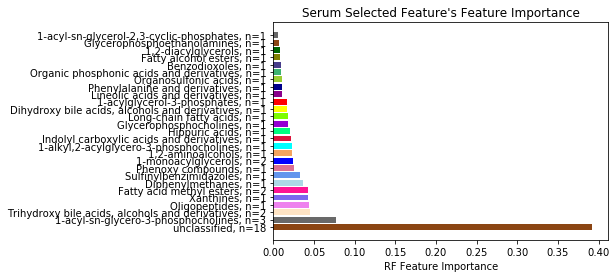

In [12]:
imp = imp_plot(feat1_imp,'direct_parent')
#plt.savefig('./fecal_ml_analysis/figures/sb_TB25_featimp_directparent.pdf',bbox_inches = 'tight')

<Figure size 720x720 with 0 Axes>

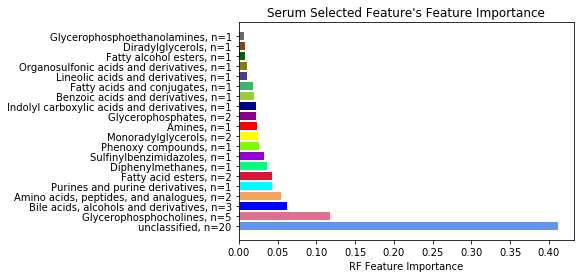

In [14]:
imp = imp_plot(feat1_imp,'subclass')
plt.savefig('./ml_analysis/featImp_analysis/selFeat-featimp-subclass.pdf',bbox_inches = 'tight')